In [1]:
import sys
import os
import pandas as pd

# Add the project root to the Python path
sys.path.append(os.path.join(os.getcwd(), '..'))

# Import the project modules
from src.config import setup_logging
from src.extract import fetch_statsbomb_event_data
from src.viz import create_gk_distribution_plot
from src.transform import transform_to_goal_kick_events
from src.stats import calculate_gk_stats

# Reload modules when code is changed (uncomment for development)
%load_ext autoreload
%autoreload 2

# Init logging
logger = setup_logging(log_file="../logs/gk_distribution.log")

In [ ]:
events = fetch_statsbomb_event_data()

2025-10-02 10:53:01,486 - src.extract.statsbomb_data - INFO - Fetching StatsBomb event data for Europe - UEFA Euro - 2024 - male
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: No

In [3]:
list(events.columns)

['50_50',
 'bad_behaviour_card',
 'ball_receipt_outcome',
 'ball_recovery_offensive',
 'ball_recovery_recovery_failure',
 'block_deflection',
 'block_offensive',
 'block_save_block',
 'carry_end_location',
 'clearance_aerial_won',
 'clearance_body_part',
 'clearance_head',
 'clearance_left_foot',
 'clearance_other',
 'clearance_right_foot',
 'counterpress',
 'dribble_no_touch',
 'dribble_nutmeg',
 'dribble_outcome',
 'dribble_overrun',
 'duel_outcome',
 'duel_type',
 'duration',
 'foul_committed_advantage',
 'foul_committed_card',
 'foul_committed_offensive',
 'foul_committed_penalty',
 'foul_committed_type',
 'foul_won_advantage',
 'foul_won_defensive',
 'foul_won_penalty',
 'goalkeeper_body_part',
 'goalkeeper_end_location',
 'goalkeeper_outcome',
 'goalkeeper_penalty_saved_to_post',
 'goalkeeper_position',
 'goalkeeper_punched_out',
 'goalkeeper_shot_saved_off_target',
 'goalkeeper_shot_saved_to_post',
 'goalkeeper_success_in_play',
 'goalkeeper_technique',
 'goalkeeper_type',
 'id'

In [7]:
gk_events = transform_to_goal_kick_events(events)
gk_events.head()

2025-10-02 10:53:13,592 - src.transform.goal_kick_events - INFO - Transforming 187858 records from events data to goal kick events.


,match_id,team,player,position,x,y,end_x,end_y,pass_outcome,pass_length
607,3942819,England,Jordan Pickford,Goalkeeper,2.1,38.9,4.3,55.2,Complete,short
638,3942819,Netherlands,Virgil van Dijk,Left Center Back,6.5,33.5,5.0,44.1,Complete,short
846,3942819,England,Jordan Pickford,Goalkeeper,5.2,45.3,56.1,55.9,Unknown,long
874,3942819,Netherlands,Virgil van Dijk,Left Center Back,4.2,34.2,3.7,41.9,Complete,short
1054,3942819,England,John Stones,Center Back,7.0,49.3,19.6,66.8,Complete,short


In [8]:
# Calculate statistics
gk_stats = calculate_gk_stats(gk_events)
gk_stats.head(25)

2025-10-02 10:53:13,675 - src.stats.goalkicks - INFO - Calculating statistics for goal kicks.


,team,total_passes,short_percentage,long_percentage,short_passes,completed_short_passes,incomplete_short_passes,completed_short_percentage,incomplete_short_percentage,long_passes,completed_long_passes,incomplete_long_passes,completed_long_percentage,incomplete_long_percentage
0,England,52,29,71,15,15,0,100,0,37,21,16,57,43
1,Netherlands,40,70,30,28,28,0,100,0,12,6,6,50,50
2,Spain,51,51,49,26,26,0,100,0,25,9,16,36,64
3,France,35,80,20,28,27,1,96,4,7,4,3,57,43
4,Turkey,41,49,51,20,20,0,100,0,21,9,12,43,57
5,Portugal,35,71,29,25,25,0,100,0,10,7,3,70,30
6,Austria,25,76,24,19,19,0,100,0,6,2,4,33,67
7,Denmark,28,39,61,11,11,0,100,0,17,13,4,76,24
8,Switzerland,33,61,39,20,20,0,100,0,13,4,9,31,69
9,Germany,21,71,29,15,15,0,100,0,6,4,2,67,33


2025-10-02 10:53:13,755 - src.viz.gk_distribution - INFO - Creating goal kick distribution plot for Spain


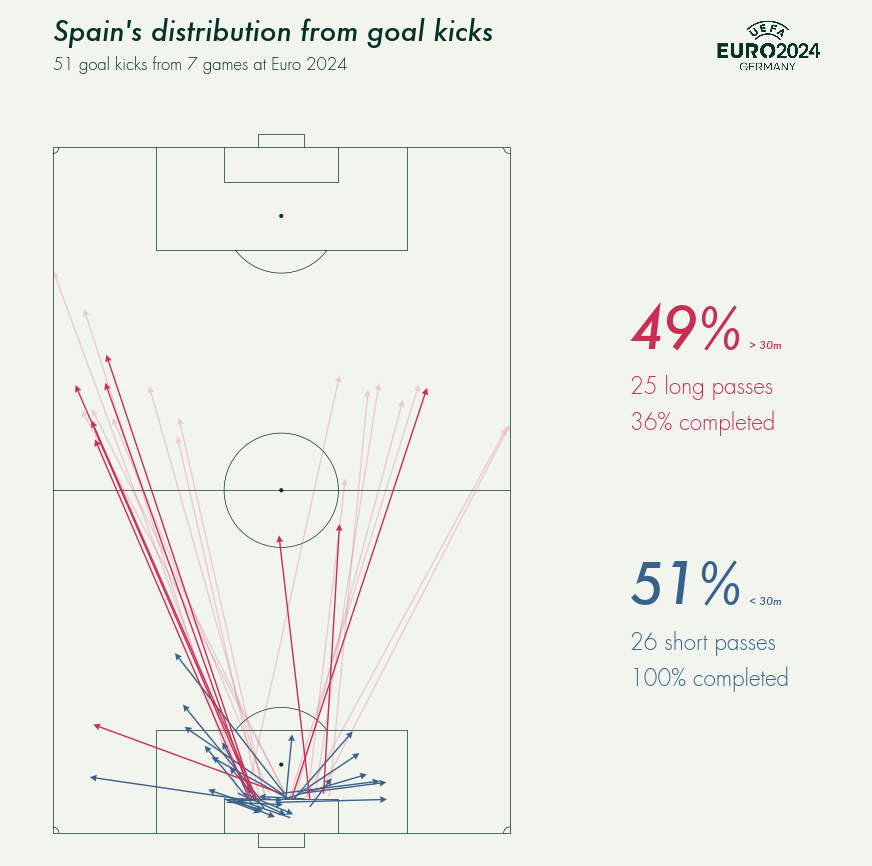

In [9]:
fig = create_gk_distribution_plot("Spain", gk_events, gk_stats)